In [1]:
!pip install pycausalimpact

In [124]:
# Data processing
import pandas as pd
import numpy as np
from datetime import datetime
# Create synthetic time-series data
from statsmodels.tsa.arima_process import ArmaProcess
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Causal impact
from causalimpact import CausalImpact

In [233]:
causal_df = pd.read_csv('first_txns_uplift_personal_non_referral - SUs.csv')

In [158]:
causal_df = pd.read_csv('first_txns_uplift_personal_non_referral - ao_.csv')

In [181]:
causal_df = pd.read_csv('first_txns_uplift_personal_non_referral - first_txns.csv')

In [203]:
causal_df = pd.read_csv('first_txns_uplift_personal_non_referral - DAU.csv')

In [242]:
causal_df = pd.read_csv('first_txns_uplift_personal_non_referral - Transactions.csv')

In [243]:
causal_df['date'] = pd.to_datetime(causal_df['date'])

In [244]:
causal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           10 non-null     datetime64[ns]
 1   marketing      10 non-null     int64         
 2   non_marketing  10 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 372.0 bytes


In [245]:
causal_df.set_index('date', inplace=True)

In [246]:
causal_df

,marketing,non_marketing
date,,
2024-01-29,703724,341667
2024-02-05,863659,406170
2024-02-12,892339,423684
2024-02-19,958257,447522
2024-02-26,1132225,539618
2024-03-04,1317384,615763
2024-03-11,1286933,610032
2024-03-18,1434665,668856
2024-03-25,1596615,741947


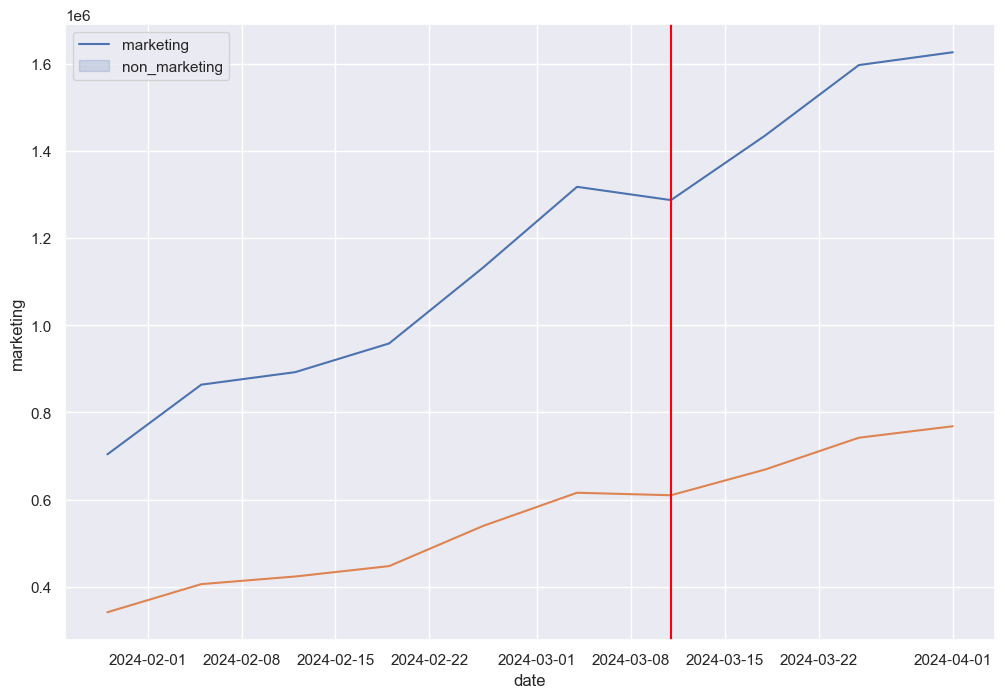

In [247]:
# Visualize data using seaborn
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x=causal_df.index, y=causal_df['marketing'])
sns.lineplot(x=causal_df.index, y=causal_df['non_marketing'])
plt.axvline(x= causal_df.index[6], color='red')
plt.legend(labels = ['marketing', 'non_marketing'])

In [248]:
pre_period = [str(causal_df.index.min())[:6], str(causal_df.index[6])[:10]]

In [249]:
# Set pre-period
pre_period = [str(causal_df.index.min())[:10], str(causal_df.index[5])[:10]]
# Set post-period
post_period = [str(causal_df.index[6])[:10], str(causal_df.index.max())[:10]]
# Print out the values
print(f'The pre-period is {pre_period}')
print(f'The post-period is {post_period}')

The pre-period is ['2024-01-29', '2024-03-04']
The post-period is ['2024-03-11', '2024-04-01']


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_mo

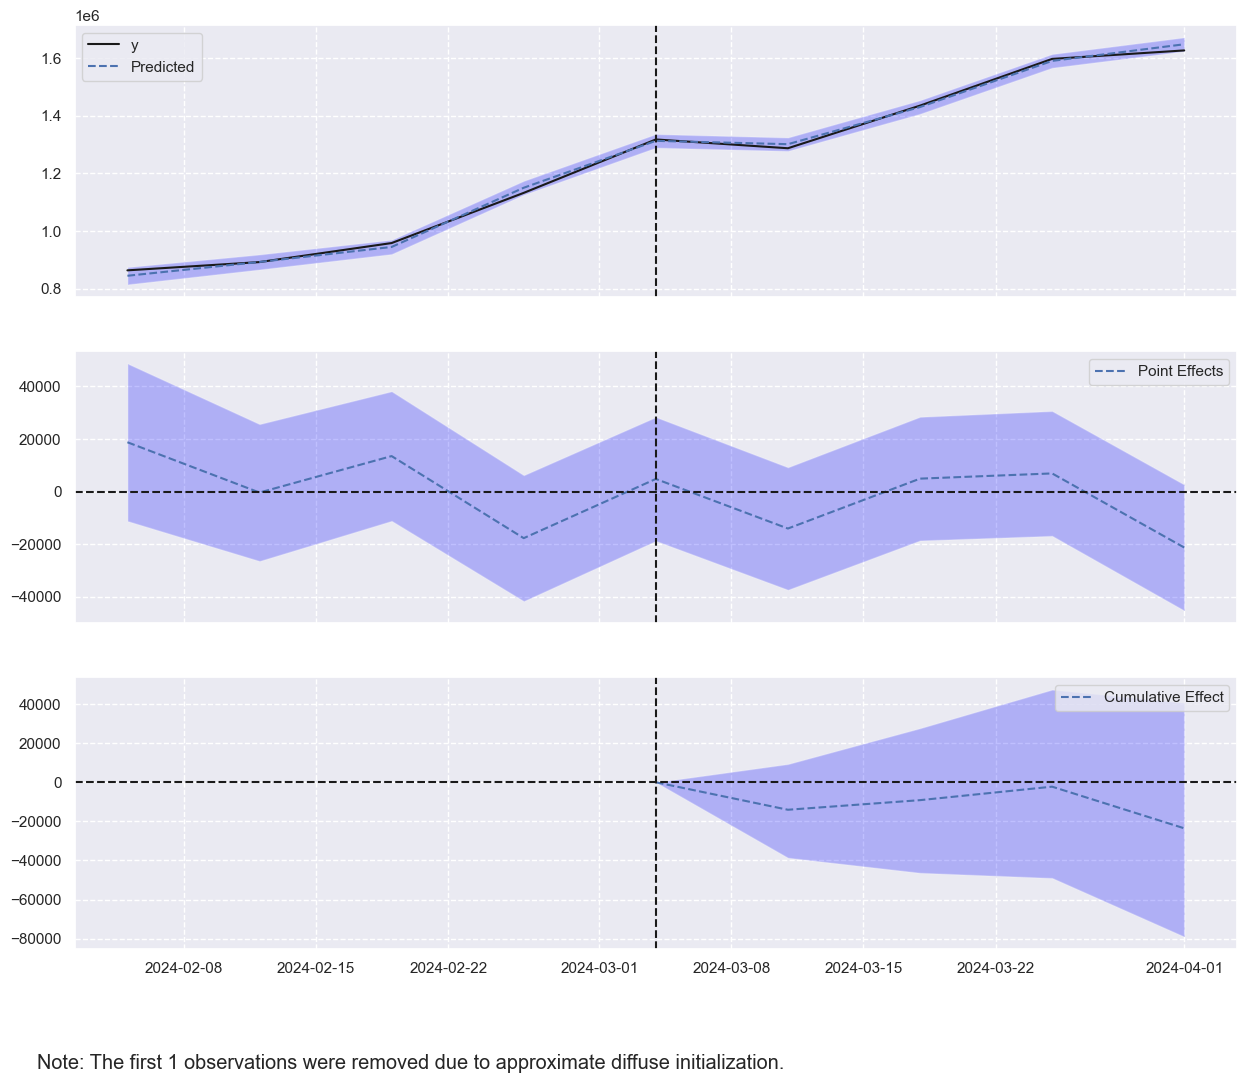

In [250]:
# Causal impact model
impact = CausalImpact(data=causal_df, pre_period=pre_period, post_period=post_period)
# Visualization
impact.plot()

In [251]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    1486062.75         5944251.0
Prediction (s.d.)         1491953.82 (7632.82)5967815.3 (30531.3)
95% CI                    [1475893.66, 1505813.78][5903574.62, 6023255.11]

Absolute effect (s.d.)    -5891.07 (7632.82) -23564.3 (30531.3)
95% CI                    [-19751.03, 10169.09][-79004.11, 40676.38]

Relative effect (s.d.)    -0.39% (0.51%)     -0.39% (0.51%)
95% CI                    [-1.32%, 0.68%]    [-1.32%, 0.68%]

Posterior tail-area probability p: 0.22
Posterior prob. of a causal effect: 77.52%

For more details run the command: print(impact.summary('report'))


In [252]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 1486062.75. In the absence of an
intervention, we would have expected an average response of 1491953.82.
The 95% interval of this counterfactual prediction is [1475893.66, 1505813.78].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -5891.07 with a 95% interval of
[-19751.03, 10169.09]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 5944251.0.
Had the intervention not taken place, we would have expected
a sum of 5967815.3. The 95% interval of this prediction is [5903574.62, 6023255.11].


The above results are given in terms of absolute numbers. In relative
terms, t

In [192]:
ci = CausalImpact(causal_df, pre_period, post_period)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_mo

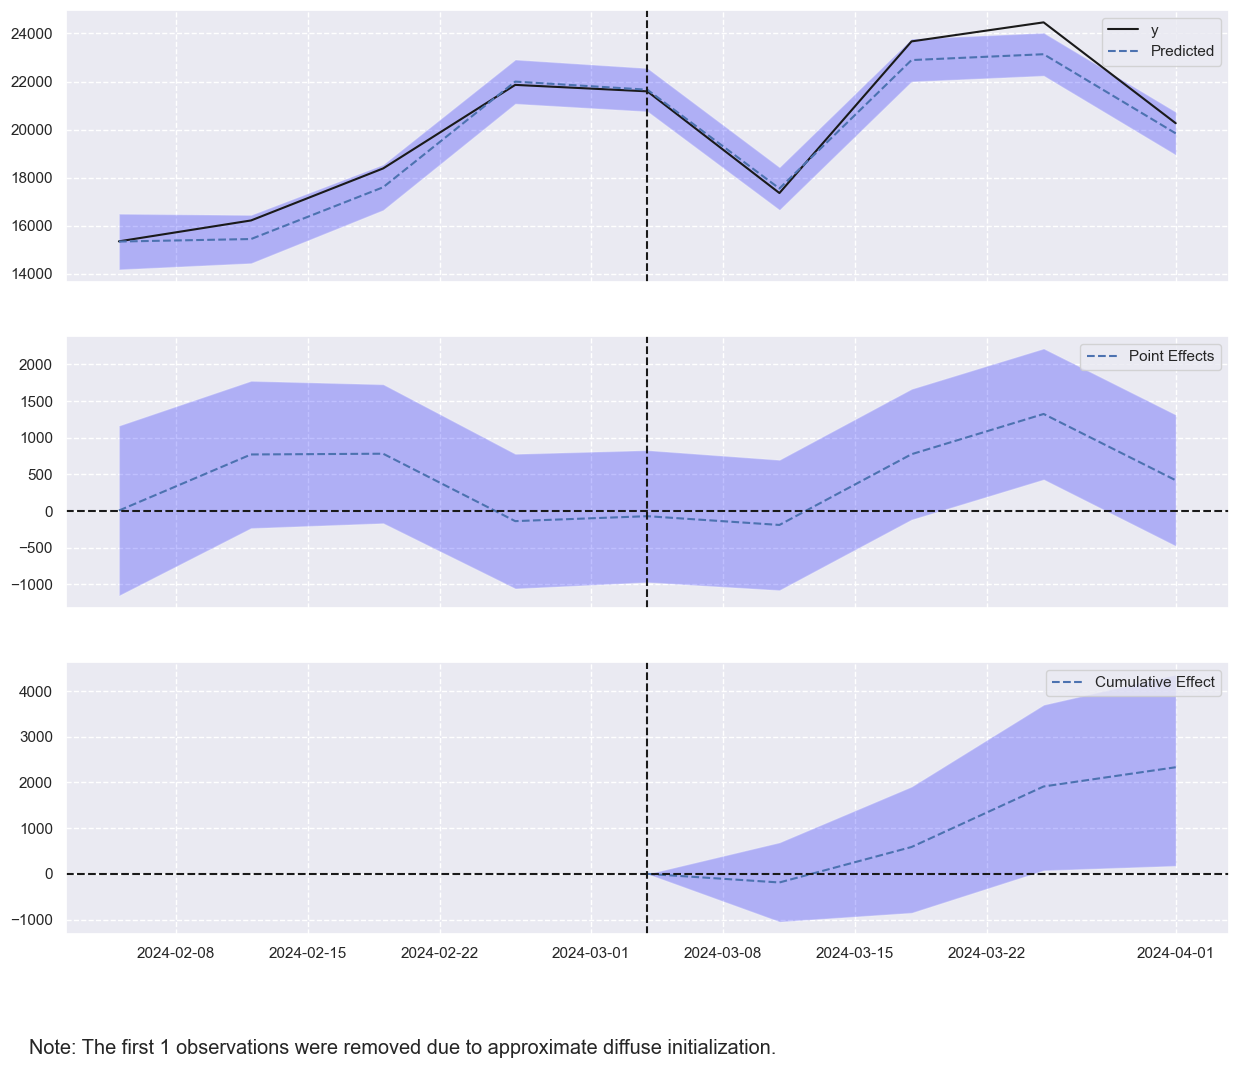

In [29]:
ci.plot()